In [1]:
### Run this cell before continuing.
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
require(gridExtra)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

# Heart Disease and Age
<img align="left" src="https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/slideshows/how_heart_disease_affects_your_body_slideshow/650x350_how_heart_disease_affects_your_body_slideshow.jpg" width="500"/>

# Introduction #

**Background Information** 

Heart disease is a broad range of diseases that affects an individual's heart and blood vessels. These diseases can be influenced by many factors, including underlying health conditions and lifestyle choices. As individuals get older, their risk of developing heart disease increases, and the severity of heart disease is usually greater in older individuals. Additionally, the structures and functions of the heart and blood vessels can also change with age, making older individuals more susceptible to heart disease.

**The Project**

We chose to explore the relationship between the severity of heart disease symptoms and age using a linear regression model, with multiple symptoms as our predictors and age as our response variable. Instead of showing a single relationship between a symptom and age, we opted to use age as our response variable which allowed the use of multiple symptoms as predictors. This can better reflect the variability of this disease. On the other hand, exploring the relationship with age and a single symptom, would give a very narrow picture of correlation between single heart disease symptoms and age by itself.

# Our Question # 

**Can the age of an individual with heart disease be predicted by the severity of their symptoms? If so, what are the best predictors?**

# The Dataset #


We are using the “Heart Disease” dataset. This dataset describes a range of attributes, as well as an indication as to the presence of heart disease within each individual. The specific datasets we will be analyzing contains a subset of 14 main attributes, including information about a patient’s sex, age, symptoms, and diagnosis. The data has been collected from hospitals in the U.S., Switzerland, and Hungary.

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

# Methods #

The dataset was first analyzed, in order to determine it was appropriate for our analysis. It was then read, and wrangled locally.

In [23]:
# First we must read in the datasets.
va_data_csv <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data",col_names =
               c("age", "sex", "chest_pain", "trestbps", "chol",
               "fbs",  "restecg", "thalach", "exang", "oldpeak", 
               "slope", "ca", "thal", "num"))

cleveland_data_csv <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names =
               c("age", "sex", "chest_pain", "trestbps", "chol",
               "fbs",  "restecg", "thalach", "exang", "oldpeak", 
               "slope", "ca", "thal", "num")) 

hungary_data_csv <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", col_names =
               c("age", "sex", "chest_pain", "trestbps", "chol",
               "fbs",  "restecg", "thalach", "exang", "oldpeak", 
               "slope", "ca", "thal", "num"))

switzerland_data_csv <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", col_names =
               c("age", "sex", "chest_pain", "trestbps", "chol",
               "fbs",  "restecg", "thalach", "exang", "oldpeak", 
               "slope", "ca", "thal", "num"))

#Merge the datasets, and change the factors to be numeric.
heart_disease_data <- rbind(va_data_csv,cleveland_data_csv,hungary_data_csv, switzerland_data_csv) %>%
                select(-sex) %>%
                select(-num) %>%
                mutate_all(as.numeric) %>% 
                filter(age != "?") %>%
                filter(chest_pain != "?") %>%
                filter(chol != "?")%>%
                filter(fbs != "?") %>%
                filter(restecg != "?") %>%
                filter(thalach != "?")%>%
                filter(exang != "?")%>%
                filter(oldpeak != "?") %>%
                filter(slope != "?") %>%
                filter(ca != "?") %>%
                filter(thal != "?") %>%
                filter(trestbps != "?") %>%
                suppressWarnings


Rows: 200 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, thalach, exang, oldpeak, slope, ca, thal
dbl (5): age, sex, chest_pain, restecg, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, chest_pain, trestbps, chol, fbs, restecg, thalach, exang...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thal
dbl (5): age, sex, chest_pain, oldpeak, num

ℹ Use 

# Exploratory Data Analysis #

To conduct the data analysis, the data was split into a training and testing set. A 60/40 split was chosen, as 60% is a meaningful enough value to train the model, and 40% is enough to tell whether the model predicts correctly. A preliminary table analyzing the relationship between age and three variables was also organized, to see if our question may have significance.

In [3]:
#in order to make the analysis reproducible:
set.seed(2000)

#split the data:  
heart_split <- initial_split(heart_disease_data, prop = 0.60, strata = age) 
heart_training <- training(heart_split)  
heart_testing <- testing(heart_split)  

#In our exploratory data analysis, we used only three variables as predictors:.
heart_data_explore <- heart_training %>%
             select(age, restecg, trestbps, chol) %>%
             arrange(desc(chol))


head(heart_data_explore)

age,restecg,trestbps,chol
<dbl>,<dbl>,<dbl>,<dbl>
67,2,115,564
65,2,140,417
56,2,134,409
63,2,150,407
62,2,140,394
65,2,160,360


**Figure 1: Table of Preliminary Analysis of Heart Disease Symptoms vs. Age**

From the table, an increase in resting blood pressure and cholesterol seems to be associated with increased age. "Restecg" has no change, and might not be the best predictor.

A histogram was then created in order to see the age distribution within our dataset. This allowed better understanding of trends between heart disease and age, as well as the age range of our set.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



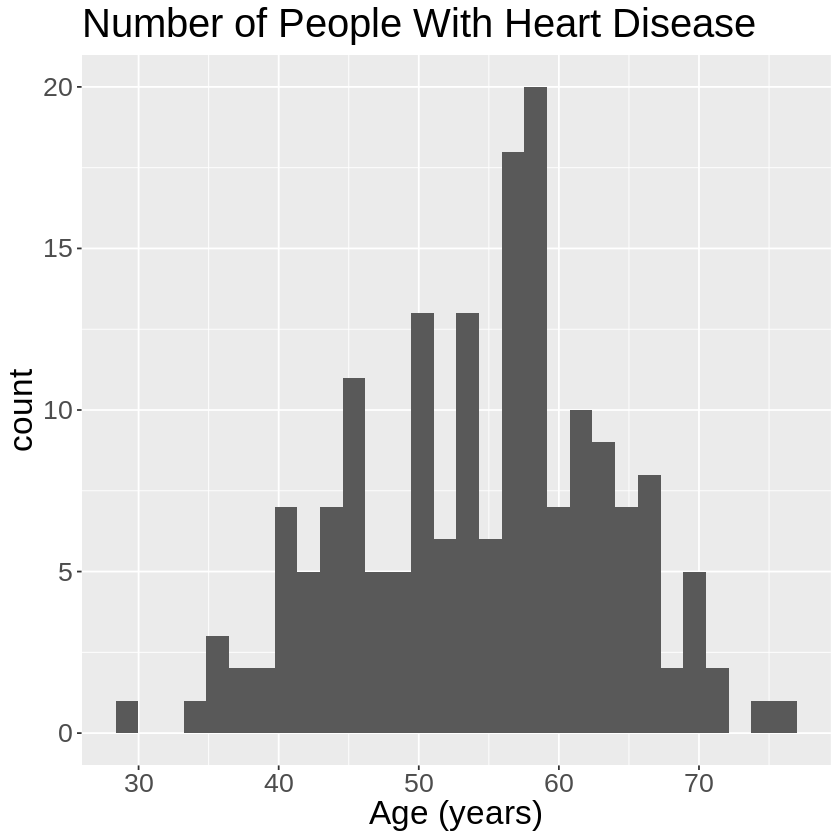

In [4]:
#In order to visualize the age distribution:
heart_plot_hist <- ggplot(heart_training, aes(x = age)) + 
            geom_histogram() + 
            labs(x = "Age (years)", title = "Number of People With Heart Disease") + 
            theme( text = element_text(size = 20)) 
heart_plot_hist

**Figure 2: Histogram Showing the Distribution of Age of Heart Disease Patients** 

The histogram above shows a positive correlation between age and the quantity of people from the dataset with heart disease. The majority of those with heart disease are between the ages of 55 and 65.

Finally, all of the variables were plotted in relation to observe all possible correlations, especially the strongest ones.

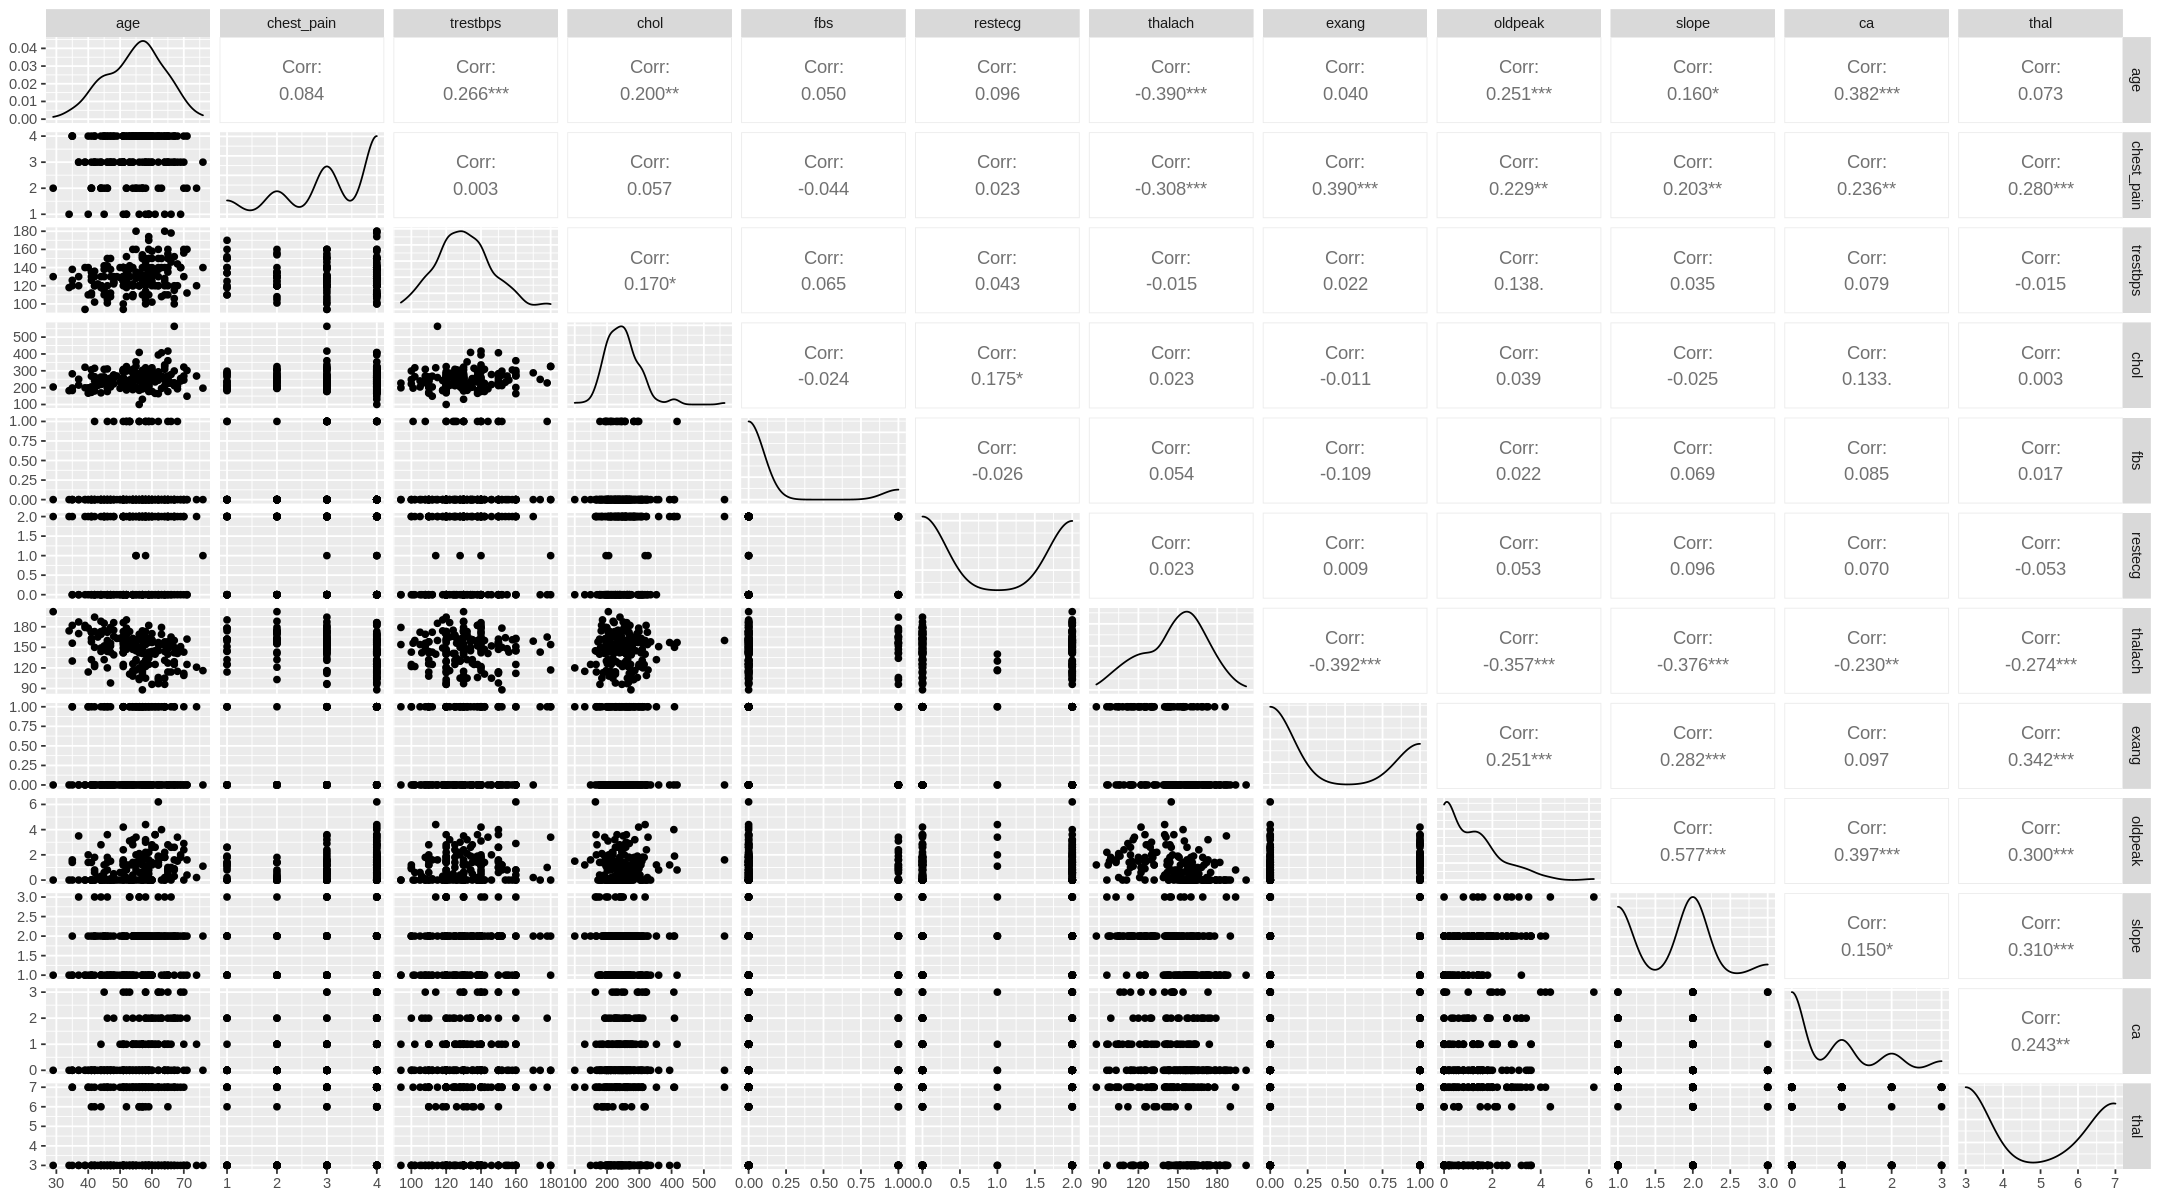

In [5]:
set.seed(2000)
options(repr.plot.width = 18, repr.plot.height = 10)

#To visualize the predictor variables:
heart_eda <- heart_training %>%
             ggpairs(columns = 1:12, alpha = 0.05) %>%
             suppressWarnings() 
             
heart_eda

**Figure 3: Plot Displaying Each of the Correlation Between Various Heart Disease Symptoms and Age** 


*The range of the correlation coefficient is a continuous numerical scale from -1 to 1.  
A value of -1 indicates perfect negative correlation, 1 indicates perfect positive correlation, and 0 indicates no correlation observed.*

From the plot in Fig. 3, the overall five highest strongest correlation values between symptoms and age are: 

- Thalach (-0.390)
- Ca (0.382)
- Trestbps (0.266)
- Oldpeak (0.251)
- Chol (0.200)

(*Ranked from strongest to weakest correlation, with correlation coefficient in brackets*)


 # Methods #

The variables with the five highest correlation values were selected as predictors for a model predicting age, in an attempt to maximize accuracy of the model. The variables selected are as followed:

- Trestbps - resting blood pressure.
Resting blood pressure (measured in mm Hg) is roughly 120/80 (systolic over diastolic measurements). A blood pressure level higher than this can damage arteries, and, cause heart disease.

- Thalach - maximum heart rate achieved. 
An average, healthy heart rate is between 60-100 beats per minute, with a healthy maximum heart rate of about a person's age (in years) subtracted from 220. A maximum heart rate outside of this range may indicate heart disease. Heart rate tends to decrease as one ages.

- Ca - number of major vessels coloured by fluoroscopy.
Fluoroscopy is a medical procedure used to study moving structures within the body. This can be used to assess blood flow through arteries. Blood flow tends to decrease with age, due to the buildup of cholesterol and other factors. More coloured vessels is associated with worse ventricular blood flow.

- Oldpeak - ST depression induced by exercise relative to rest. 
ST depression is a term used to describe an abnormal downwards spike ("depression") on an electrocardiographic reading. A larger size and frequency of this occurrence are both indicators of more severe heart disease.

- Chol - serum cholesterol in mg/dL.
A healthy cholesterol level is around 200mg/dL. A level above 240mg/dL represents an individual at great risk of, or who suffers with, heart disease. Individuals tend to accumulate higher cholesterol levels as they age due to both lifestyle and health changes.


# Linear Regression Model #

We created a linear regression model, to predict age based off of the five aforementioned variables. Linear regression was selected, as age is a continuous numerical value.

In [6]:
set.seed(2000)
#create linear regression specs.
lm_spec <- linear_reg() %>%
    set_engine("lm") %>%
    set_mode("regression")

#Create a recipe to predict age.
heart_recipe <- recipe(age ~ trestbps + thalach + ca + oldpeak  + chol, data = heart_disease_data ) %>%
        step_scale(all_predictors()) %>%
        step_center(all_predictors()) 

print(lm_spec)
print(heart_recipe)

Linear Regression Model Specification (regression)

Computational engine: lm 

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          5

Operations:

Scaling for all_predictors()
Centering for all_predictors()


In [7]:
set.seed(2000)
#create a workflow to fit the recipe to the model
heart_fit <- workflow() %>%
    add_recipe(heart_recipe) %>%
    add_model(lm_spec) %>%
    fit(data = heart_training)

heart_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)     trestbps      thalach           ca      oldpeak         chol  
    54.5876       1.9753      -3.0089       2.5066      -0.1092       1.2251  


To establish the accuracy of the model, the root mean square errors of both the testing and training sets were found. This is vital in determining whether or not our question can be answered, and, the strength of any correlations.

In [8]:
set.seed(2000)
#determine the root mean square error of our model
lm_rmse <- heart_fit %>%
        predict(heart_training) %>%
        bind_cols(heart_training) %>%
        metrics(truth = age, estimate = .pred) %>%
        filter(.metric == "rmse") %>%
        select(.estimate) %>%
        pull()

lm_rmse

[1] 7.495137

In [9]:
set.seed(2000)
#determine the root mean square prediction error of our model
lm_rmspe <- heart_fit %>%
        predict(heart_testing) %>%
        bind_cols(heart_testing) %>%
        metrics(truth = age, estimate = .pred) %>%
        filter(.metric == "rmse") %>%
        select(.estimate) %>%
        pull()

lm_rmspe

[1] 7.602451

# Residuals #

To visualize the data, a plot showing the residuals for age was created. The residuals plot provides visual understanding of the relationship between our model, and the true values.

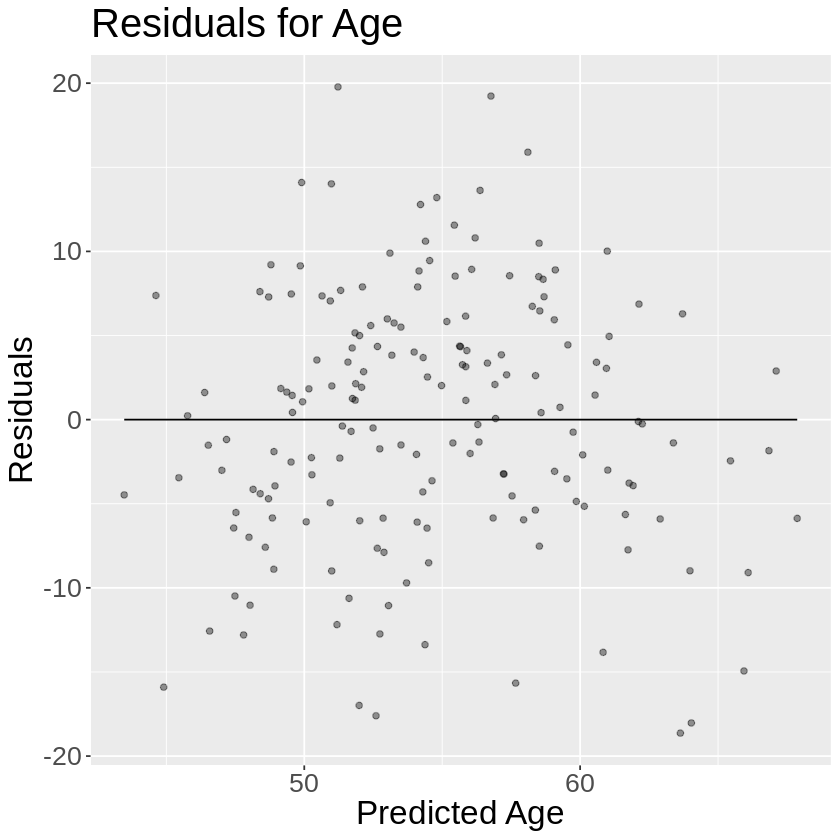

In [15]:
# create a dataframe of age & predicted age
heart_preds <-  heart_fit %>%
                predict(heart_training) %>%
                bind_cols(heart_training) %>%
                select(.pred, age)

heart_preds_tibble <-  as_tibble(heart_preds) 
 
# create a dataframe with a column for age residuals(observed - predicted age)
heart_preds_res <- heart_preds %>%
                mutate(residuals = age - .pred) 

# create a plot of predicted age vs. residuals for predicted age

options(repr.plot.width = 7, repr.plot.height = 7)
heart_res_plot <- ggplot(heart_preds_res, aes(x = .pred, y = residuals)) + 
                geom_point(alpha = 0.4) + 
                geom_line(y = 0) +
                xlab("Predicted Age") + 
                ylab("Residuals") + 
                ggtitle("Residuals for Age") +  
                theme(text = element_text(size = 20)) 
heart_res_plot

**Figure 4: Plot of Residuals for Age** 

Residuals are the difference between the observed and predicted age. The residuals for a model of a good fit should be scattered above and below the x-axis with no pattern, and of a reasonably relatively low magnitude.

From the plot in Fig.4, the residuals are mostly randomly scattered above and below x-axis (y = residuals = 0). Additionally, there are possible outliers (located in the higher/lower range). The total display of residuals range from approximately -15 to 20, although the majority of residuals seem to fall between -10 and 10, with areas of most concentration occuring from around -7 to 8. 


# Predictors vs. Age #

Plots of each of the predictors vs. age were created to visualize the individual relationships, including whether or not each symptom does individually worsen as one ages.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



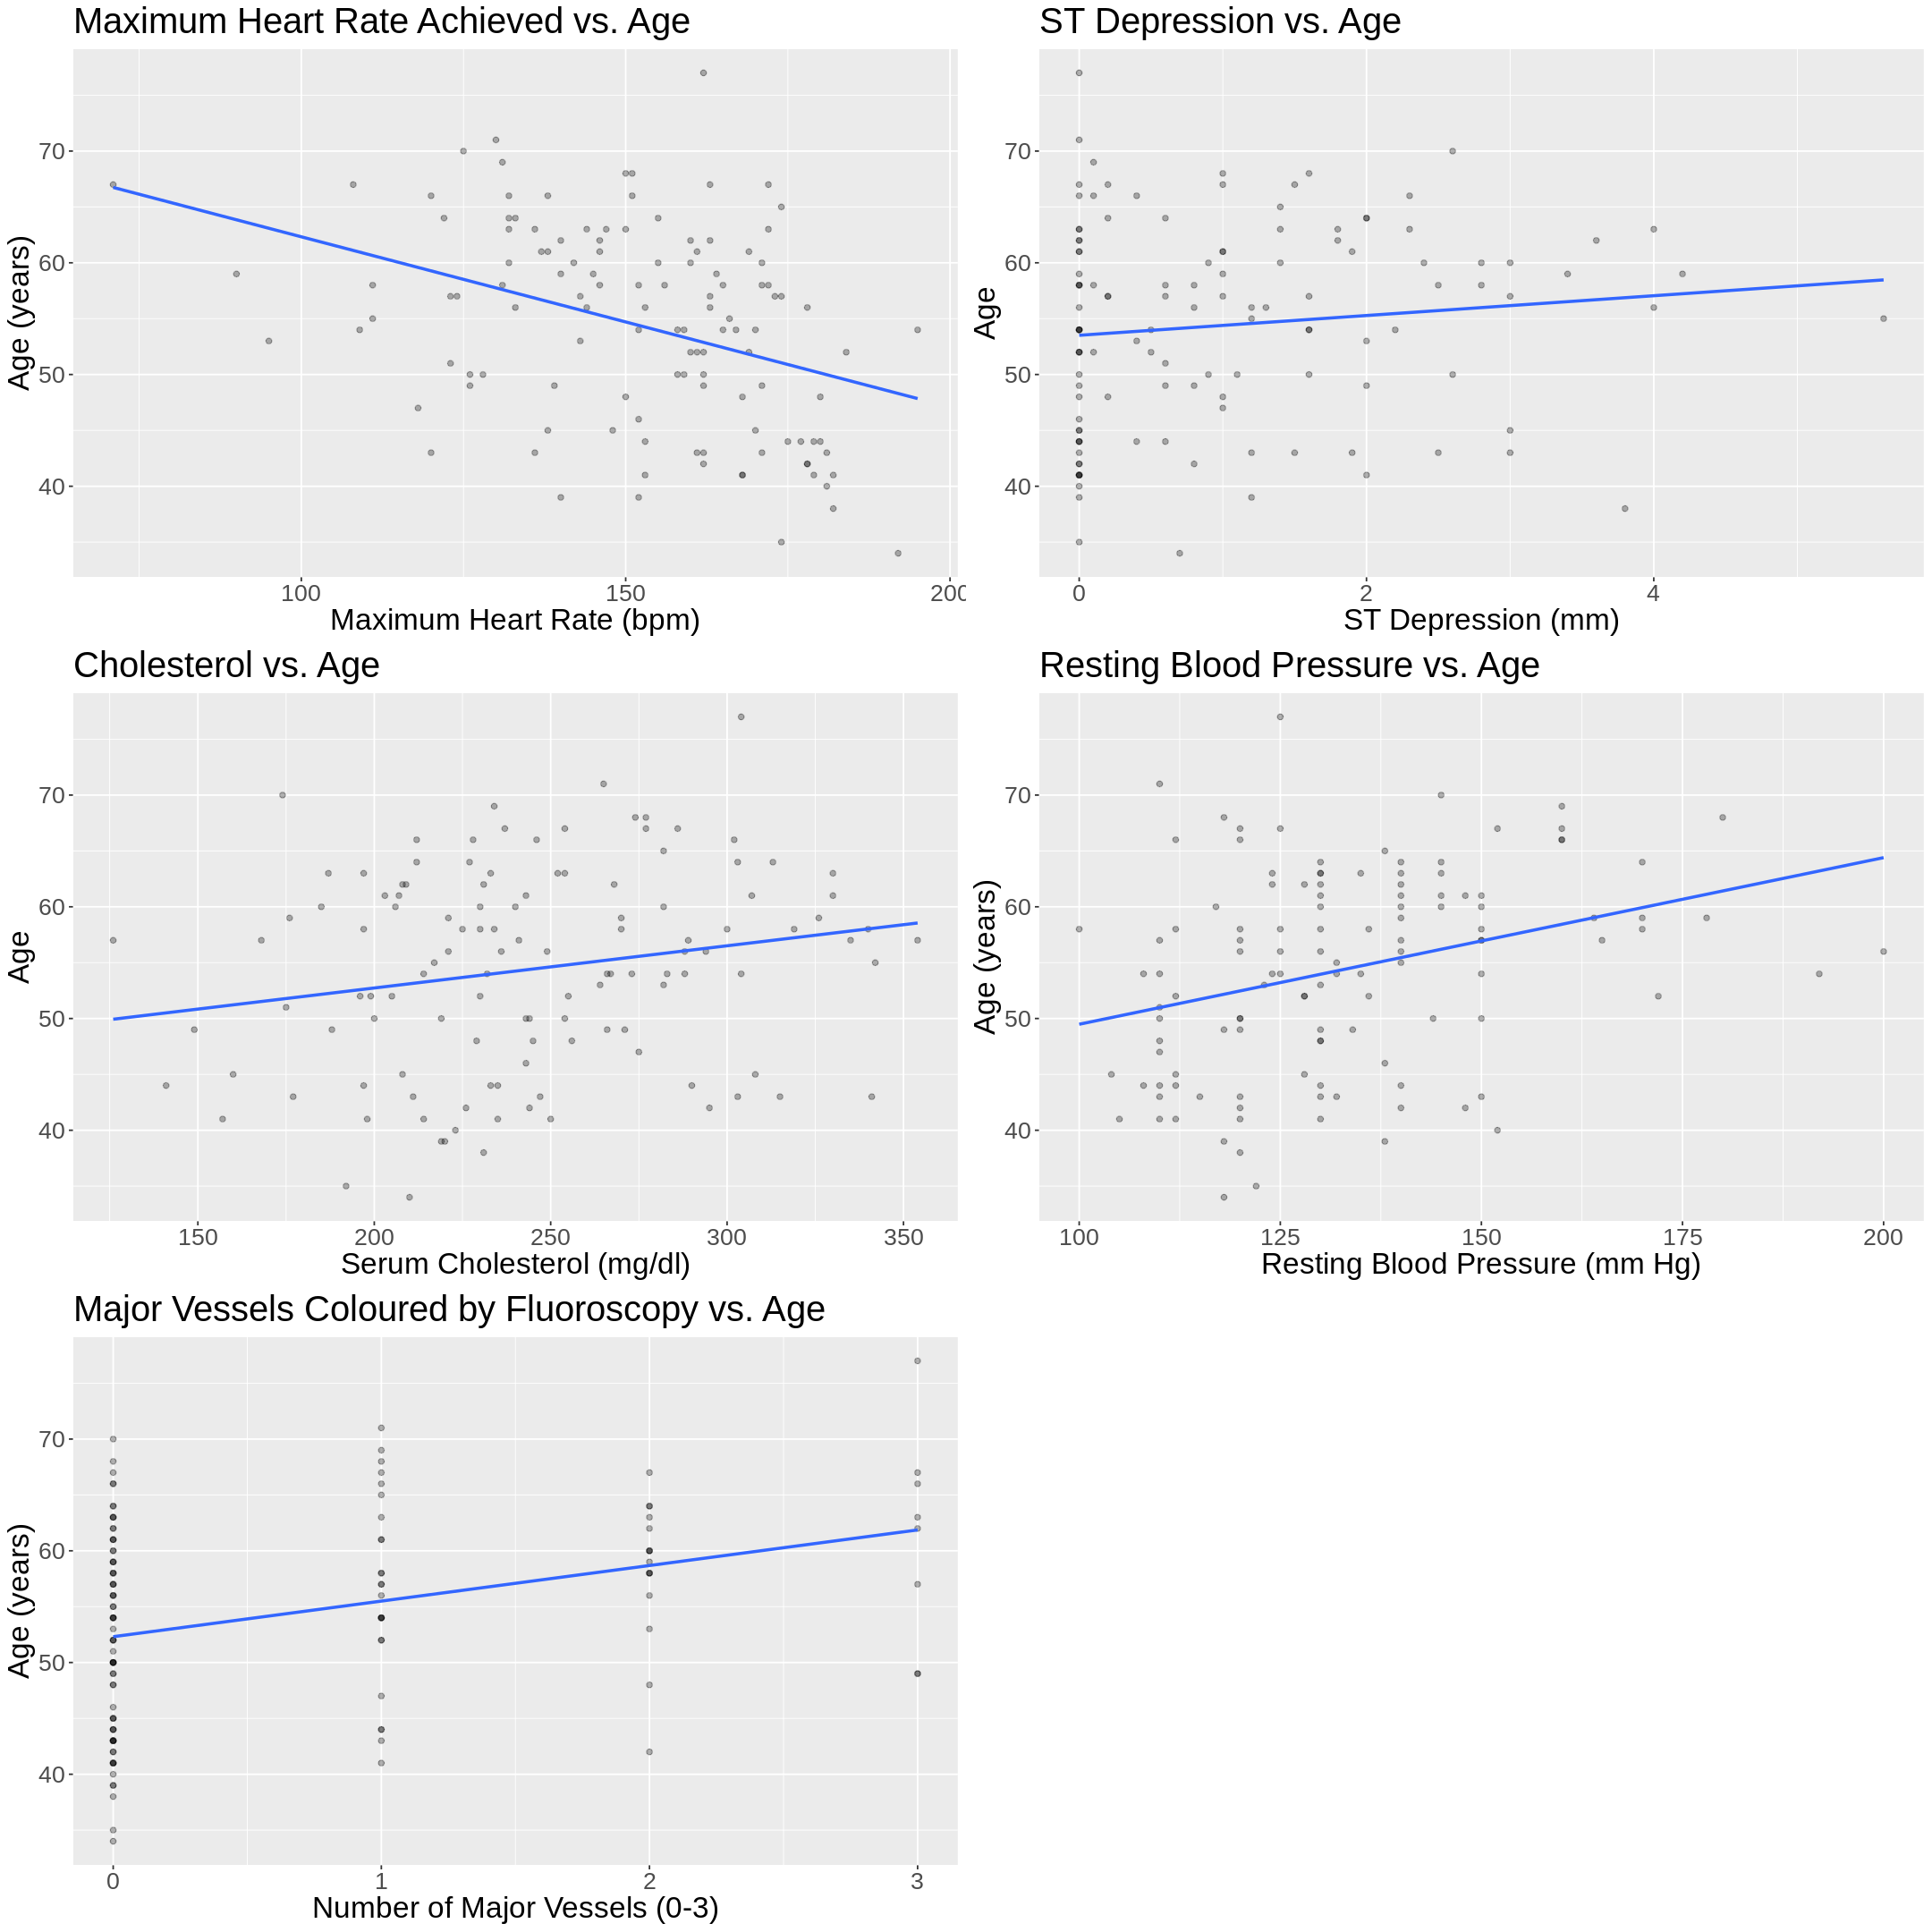

In [24]:
options(repr.plot.width = 8, repr.plot.height = 8)
        
#Create a graph comparing resting maximum heart rate achieved to age
thalach_age_plot <- ggplot(heart_testing, aes(x = thalach, y = age)) + 
                  geom_point(alpha = 0.3) +
                  xlab("Maximum Heart Rate (bpm)") + 
                  ylab("Age (years)") +
                  ggtitle("Maximum Heart Rate Achieved vs. Age") +
                  geom_smooth(method = "lm", se = FALSE) +
                  theme(text = element_text(size = 20)) 
        
        
#Create a graph comparing ST depression to age
oldpeak_age_plot <- ggplot(heart_testing, aes(x = oldpeak, y = age)) + 
                  geom_point(alpha = 0.3) +
                  xlab("ST Depression (mm)") + 
                  ylab("Age") + 
                  ggtitle("ST Depression vs. Age") +
                  geom_smooth(method = "lm", se = FALSE) +
                  theme(text = element_text(size = 20)) 
        
#Create a graph comparing cholesterol to age       
chol_age_plot <- ggplot(heart_testing, aes(x = chol, y = age)) + 
                  geom_point(alpha = 0.3) +
                  xlab("Serum Cholesterol (mg/dl)") + 
                  ylab("Age") + 
                  ggtitle("Cholesterol vs. Age") +
                  geom_smooth(method = "lm", se = FALSE) +
                  theme(text = element_text(size = 20)) 

#Create a graph comparing resting blood pressure to age
trestbps_age_plot <- ggplot(heart_testing, aes(x = trestbps, y = age)) + 
                  geom_point(alpha = 0.3) +
                  xlab("Resting Blood Pressure (mm Hg)") + 
                  ylab("Age (years)") + 
                  ggtitle("Resting Blood Pressure vs. Age") +
                  geom_smooth(method = "lm", se = FALSE) +
                  theme(text = element_text(size = 20))  

#Create a graph comparing number of major vessels coloured by fluoroscopy to age
ca_age_plot <- ggplot(heart_testing, aes(x = ca, y = age)) + 
                  geom_point(alpha = 0.3) +
                  xlab("Number of Major Vessels (0-3)") + 
                  ylab("Age (years)") + 
                  ggtitle("Major Vessels Coloured by Fluoroscopy vs. Age") +
                  geom_smooth(method = "lm", se = FALSE) +
                  theme(text = element_text(size = 20)) 
        



options(repr.plot.width = 18, repr.plot.height = 18)

grid.arrange(thalach_age_plot, 
             oldpeak_age_plot,
             chol_age_plot,
             trestbps_age_plot, 
             ca_age_plot,
             ncol = 2)


**Figure 5: Plots of Predictors vs. Observed and Predicted Age** *(using testing data)*

Compares each of the predictors used in the model with age, in order to visualize the individual relationships.

Blood pressure, cholesterol, the number of major vessels coloured by fluoroscopy, and ST depression each have a weak positive relationship with age - as their values increase, expected age increases. An increase in any of these predictor variables is considered more severe. A decrease in maximum heart rate is associated with an increase in age, and a heart rate that is too low is also considered more severe.

In each of the plots, a weak linear relationship appears to be present between the predictor variable and age. The direction of this linear relationship corresponds with whether an increase in severity of symptoms is given by higher or lower magnitudes. Therefore, there is a weak positive relationship between the severity of symptoms and age.


# Summary & Interpretation: #

Our results suggest that the age of a person may be predicted by the severity of their symptoms, and more severe symptoms are weakly positively correlated with a higher age.

Our analysis methods included the use of a linear regression model with multiple predictors, the five heart disease symptoms that had highest correlation values with age during initial data analysis. After each symptom was numerically converted and scaled, we created our workflow. We then used two main types of visualizations – a residuals graph to display the differences from the predicted and observed age, and multiple  graphs showing each predictor vs. the observed age with a line of the predicted age. 

The residuals graph had no pattern and was distributed fairly evenly above and below the x-axis, although the magnitude of the residuals reached some rather high values. We found the root mean square error of our model was approximately 7.5 years, while the root mean square prediction error was approximately 7.6 years. These values were reflected in the residuals plot, as the majority of the residuals lay within +/- 8 years. Each of the predictor plots showed a weak correlation of the predictor with age, while the predicted age line was centered between all of the observed age datapoints. 

The RMSE and RMSPE values were not extremely low, however, considering the age range of our dataset (35-70), their values of ~7.5 years is reasonably accurate. The residuals seem randomly and evenly distributed enough to suggest that the model is of a reasonable fit, while the size of their range indicates that that there are still some issues with model fit.  The size of their range is definitely on the relatively larger side, and the general distribution of the residuals appears to be reflective of the calculated prediction error values. The linear correlations of varying weaknesses observed in the separate predictor vs. age vs. predicted age plots showed a positive correlation with the worsening of symptoms and age.

Our results were what we expected. We were expecting to find a general correlation between worsening symptoms and age, with higher ages being predicted by more severe symptoms. We did not expect to find a perfectly correlational positive relationship between worsening symptoms and age, as there are many ways heart disease can be caused. For example, relatively young people who have serious congenital (structural and present at birth) heart disease could have a difference in severity of symptoms than an older person developing coronary artery heart disease slowly over their lifetime due to cholesterol buildup in the arteries. 

# Impact #

Taking care of one’s health is not only defined by trips to the doctor’s office every time we are feeling quite ill.  To monitor health, an individual should go for regular checkups and maintain a healthy lifestyle that best suits their needs. As a person ages, health may start to decline in certain areas more rapidly, and one must be aware of possible risks to watch out for. Additionally, this analysis can be used to argue that older individuals should get more frequent check-ups than those that are younger. 

Being able to predict age from a person’s heart disease symptoms could be used as a comparative diagnosis. This is similar to how other health factors that may worsen with age are diagnosed with respect to expected age, such as obesity in a child if their BMI is significantly higher than the expected range for their age. For an applicable example of heart disease, if a young person's cholesterol levels were analyzed to be the same as the average 60-year-old's levels, this could indicate a higher severity case. 

Overall, the relationship between age and heart disease is a complex one, and it is influenced by a variety of factors. However, it is clear that the severity of heart disease tends to be greater in older individuals. It is important for older individuals to be aware of their increased risk of heart disease and to take steps to reduce their risk, such as maintaining a healthy diet and exercise routine and managing any underlying health conditions.

# Future Questions & Analysis #

Due to the many types of heart disease and how each type might commonly be seen more in different ages, if we were to redo this study more accurately, we would first try to separate our data into different types of heart disease. If data on the specific heart disease diagnoses of these patients were not available, different types of heart disease characterized by certain worse or less severe symptoms could be potentially classified with knn classification using a dataset with classified types to train with. Then, we might expect to find stronger relationships between age and worsening symptoms of heart disease. This more specific question, considering different types of heart disease, should reduce inaccuracies by accounting for different symptoms and age groups being most prevalent between type to type.

Additional future questions include: 
- investigating what lifestyle choices cause increased risk of heart disease (such as smoking, or athleticism).
- investigating whether the correlation between severity of symptoms and age is different in various global regions.

## References

*Websites*

- *Types of heart disease*. Heart and Stroke Foundation of Canada. (n.d.). Retrieved October 20, 2022, from https://www.heartandstroke.ca/heart-disease/what-is-heart-disease/types-of-heart-disease 

- *Cardiac catheterization.* Cardiac Catheterization | Johns Hopkins Medicine. (2021, August 8). Retrieved October 20, 2022, from https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/cardiac-catheterization 

- *Cardiac catheterization*. Centers for Disease Control and Prevention. (2021, May 18). High blood pressure symptoms and causes. Centers for Disease Control and Prevention. Retrieved October 20, 2022, from https://www.cdc.gov/bloodpressure/about.htm 

- *ECG (electrocardiogram)*. Choosing Wisely Canada. (2022, November 24). Retrieved  October 20, 2022, from https://choosingwiselycanada.org/pamphlet/ecg-electrocardiogram/ 

- Edward R. Laskowski, M. D. (2022, October 8). 2 easy, accurate ways to measure your heart rate. Mayo Clinic. Retrieved December 1, 2022, from https://www.mayoclinic.org/healthy-lifestyle/fitness/expert-answers/heart-rate/faq-20057979#:~:text=A%20normal%20resting%20heart%20rate%20for%20adults%20ranges%20from%2060,to%2040%20beats%20per%20minute 

*Journals*

- Pollehn T, Brady WJ, Perron AD, et al. The electrocardiographic differential diagnosis of ST segment depression. *Emergency Medicine Journal* 2002;19:129-135.


*Dataset*
- Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science et al. *











*et al. 

*(dataset used has multiple citation requests in addition to the host of the site)*

*1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.*

*2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.*

*3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.*

*4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.*
‌

